In [ ]:
kmkk9# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from __future__ import print_function
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import glob
from PIL import Image
from itertools import chain
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import (CenterCrop,
                                    Compose,
                                    Normalize,
                                    RandomHorizontalFlip,
                                    RandomResizedCrop,
                                    Resize,
                                    ToTensor)
from torch.optim.lr_scheduler import StepLR
from transformers import (ViTImageProcessor,
                          ViTFeatureExtractor,
                          ViTForImageClassification,
                          TrainingArguments,
                          Trainer)
from torch.utils.data import (DataLoader,
                              Dataset,
                              Subset,
                              random_split,
                              ConcatDataset)

from sklearn.model_selection import train_test_split

In [ ]:
# Set the directories
train_dir = '/content/drive/MyDrive/rice_dataset/train'
test_dir = '/content/drive/MyDrive/rice_dataset/test'


num_classes = 4
batch_size = 16
epochs = 3
lr = 0.0003
gamma = 0.1
dropout_rate = 0.1

# Model parameters
IMAGE_SIZE = 224
PATCH_SIZE = 16
DEPTH = 8

Found 674 files belonging to 4 classes.
Class names: ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


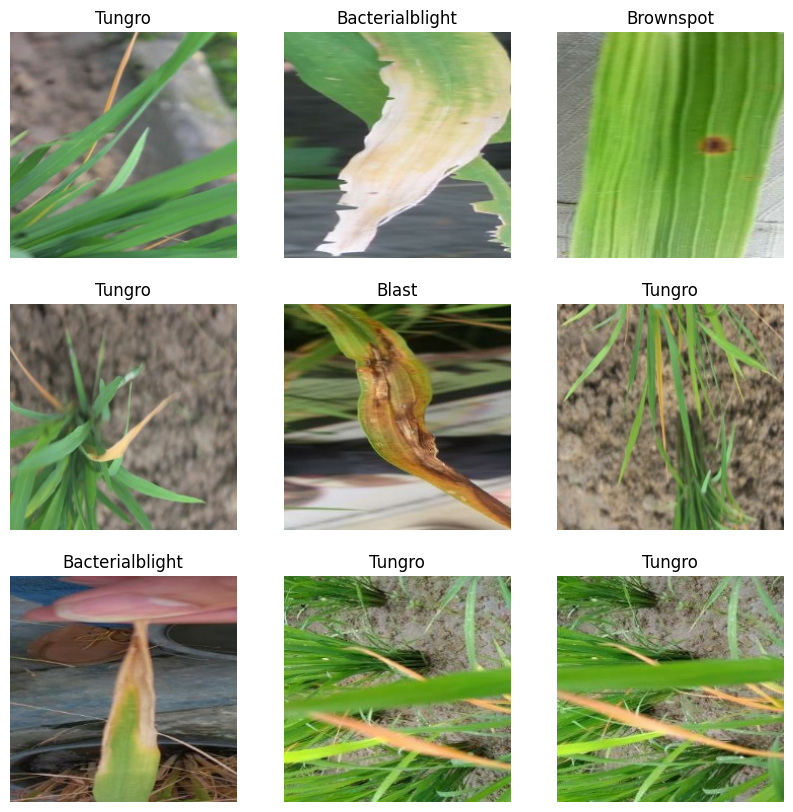

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set the directories
train_dir = '/content/drive/MyDrive/rice_dataset/train'
test_dir = '/content/drive/MyDrive/rice_dataset/test'

# Parameters
IMAGE_SIZE = 224
BATCH_SIZE = 16

# Load the training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int'  # Labels as integers
)

# Get class names
class_names = train_dataset.class_names
print("Class names:", class_names)

# Function to display images with class names
def display_images_with_labels(dataset, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch of images
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

# Display some images with their class names
display_images_with_labels(train_dataset, class_names)


In [ ]:
#processor = ViTImageProcessor.from_pretrained("google/vit-base-patch32-384")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
!pip install vit-keras tensorflow transformers




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.4 MB/s eta 0:00:00


Found 674 files belonging to 4 classes.
Found 260 files belonging to 4 classes.
Class names: ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


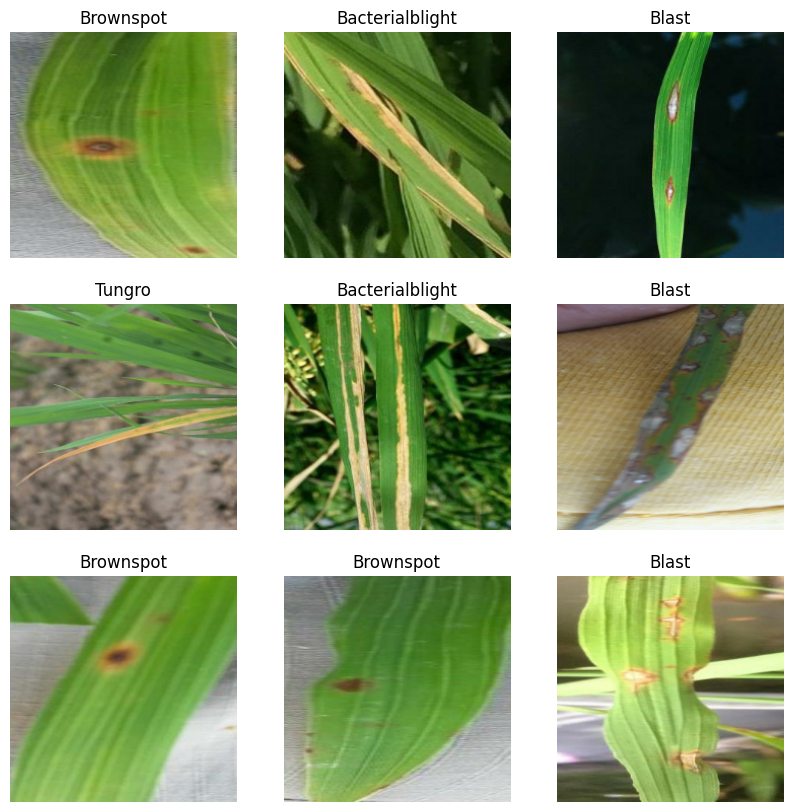

id2label: {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}
label2id: {'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}
Images shape: (16, 224, 224, 3)
Labels shape: (16,)
Epoch 1/10
43/43 [==============================] - 78s 861ms/step - loss: 1.3595 - accuracy: 0.4792 - val_loss: 0.8807 - val_accuracy: 0.6500
Epoch 2/10
43/43 [==============================] - 35s 803ms/step - loss: 0.6810 - accuracy: 0.7344 - val_loss: 0.5018 - val_accuracy: 0.8154
Epoch 3/10
43/43 [==============================] - 35s 801ms/step - loss: 0.3896 - accuracy: 0.8620 - val_loss: 0.4043 - val_accuracy: 0.8577
Epoch 4/10
43/43 [==============================] - 34s 772ms/step - loss: 0.3044 - accuracy: 0.8947 - val_loss: 0.2843 - val_accuracy: 0.9154
Epoch 5/10
43/43 [==============================] - 34s 777ms/step - loss: 0.0788 - accuracy: 0.9792 - val_loss: 0.2889 - val_accuracy: 0.9000
Epoch 6/10
43/43 [==============================] - 35s 802ms/step - loss: 0.0819 - a

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from vit_keras import vit
from transformers import ViTImageProcessor

# Load the ViT Image Processor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

# Set the directories
train_dir = '/content/drive/MyDrive/rice_dataset/train'
test_dir = '/content/drive/MyDrive/rice_dataset/test'

# Parameters
IMAGE_SIZE = size  # Should be 224 for this processor
BATCH_SIZE = 16

# Function to preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = (image - image_mean) / image_std
    return image, label

# Load the datasets without preprocessing to get class names
train_dataset_original = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_dataset_original = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Get class names
class_names = train_dataset_original.class_names
print("Class names:", class_names)

# Apply preprocessing
train_dataset = train_dataset_original.map(preprocess_image)
test_dataset = test_dataset_original.map(preprocess_image)

# Function to display images with class names
def display_images_with_labels(dataset, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

# Display some images with their class names
display_images_with_labels(train_dataset_original, class_names)

# Create dictionaries for class indices and labels
id2label = {idx: cls for idx, cls in enumerate(class_names)}
label2id = {cls: idx for idx, cls in id2label.items()}

print("id2label:", id2label)
print("label2id:", label2id)

# Verify image datasets structure
for images, labels in train_dataset.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

# Define the model
vit_model = vit.vit_b16(
    image_size=IMAGE_SIZE,
    activation='softmax',
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=len(class_names)  # Adjusting to the number of classes in the dataset
)

# Compile the model
vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
vit_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np


In [ ]:
# Predict on test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = vit_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 [==============================] - 0s 77ms/step


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.71      0.91      0.80        56
          Blast       0.88      0.60      0.72        48
      Brownspot       0.86      0.92      0.89        48
         Tungro       0.98      0.94      0.96       108

       accuracy                           0.87       260
      macro avg       0.86      0.84      0.84       260
   weighted avg       0.88      0.87      0.87       260



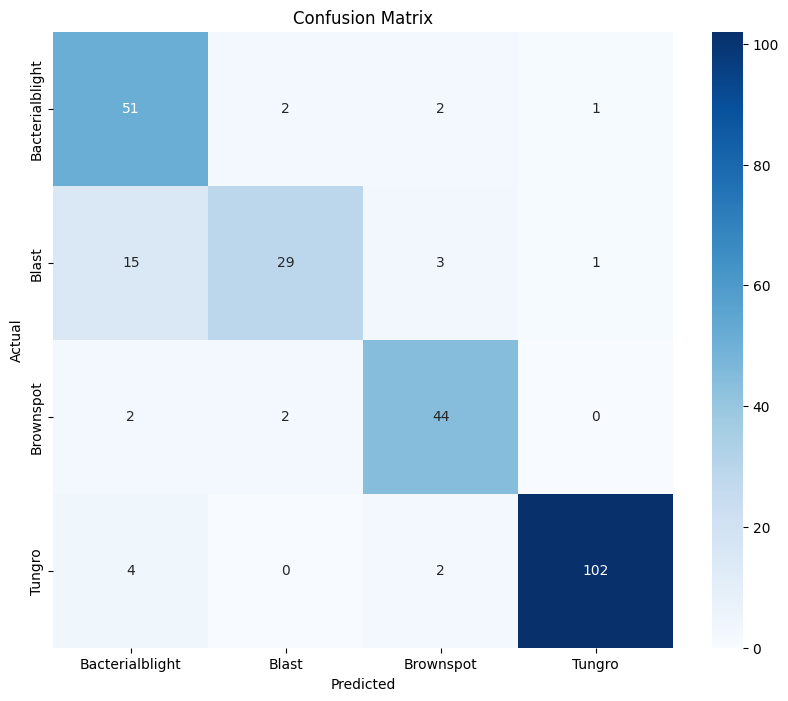

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


17/17 [==============================] - 4s 226ms/step


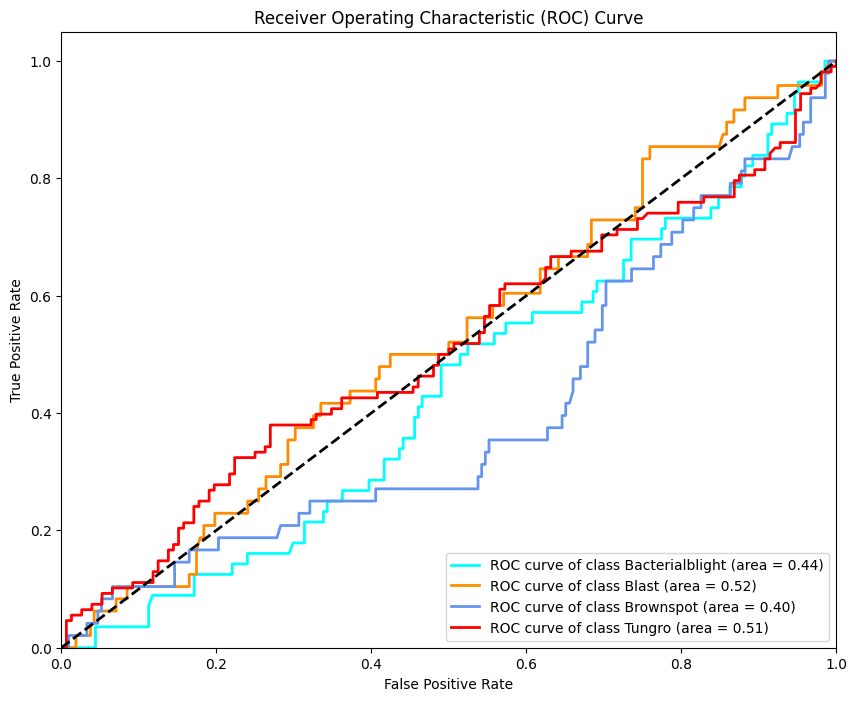

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the labels for ROC curve
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], vit_model.predict(test_dataset.map(lambda x, y: x))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), vit_model.predict(test_dataset.map(lambda x, y: x)).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'cyan', 'magenta', 'yellow', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
